In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, kruskal
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/evareidman/wine_department/main/dataset.csv')
df

,Имя,Год,Страна,Сахар,Цена,Рейтинг,Количество отзывов
0,Вино Chateau Ducru-Beaucaillou,1985.0,Франция,Сухое,56990.0,5.0,NaN
1,Вино Chateau Ducru-Beaucaillou,1986.0,Франция,Сухое,59990.0,5.0,NaN
2,Вино Chateau Pichon Longueville Comtesse de La...,1995.0,Франция,Сухое,71490.0,0.0,NaN
3,"Вино Petrus, Chateau Petrus",1997.0,Франция,Сухое,786590.0,4.8,1.0
4,Вино Chateau Latour,2000.0,Франция,Сухое,284990.0,5.0,1.0
...,...,...,...,...,...,...,...
1089,"Вино Capitel Foscarino, Roberto Anselmi",2022.0,Италия,Полусухое,3990.0,5.0,1.0
1090,"Вино Sobaja Sauvignon, Pradio",2022.0,Италия,Сухое,1990.0,4.9,14.0
1091,"Вино Samas, Agricola Punica",2022.0,Италия,Сухое,2790.0,4.3,NaN
1092,"Вино Chablis, Domaine des Chenevieres",2022.0,Франция,Сухое,3003.0,4.8,3.0


## Предобработка данных

__1. Заполнение пропусков__

In [3]:
df.isnull().sum()

Имя                     0
Год                     0
Страна                  0
Сахар                   0
Цена                    0
Рейтинг                 0
Количество отзывов    646
dtype: int64

In [4]:
df['Количество отзывов'].fillna(0, inplace=True)

In [5]:
type(df['Количество отзывов'][0])

numpy.float64

In [6]:
df.isnull().sum()

Имя                   0
Год                   0
Страна                0
Сахар                 0
Цена                  0
Рейтинг               0
Количество отзывов    0
dtype: int64

__2. Изменение типа данных столбца с годами из float в int__

In [7]:
type(df['Год'][0])

numpy.float64

In [8]:
df['Год'] = df['Год'].astype(int)

In [9]:
df.head()

,Имя,Год,Страна,Сахар,Цена,Рейтинг,Количество отзывов
0,Вино Chateau Ducru-Beaucaillou,1985,Франция,Сухое,56990.0,5.0,0.0
1,Вино Chateau Ducru-Beaucaillou,1986,Франция,Сухое,59990.0,5.0,0.0
2,Вино Chateau Pichon Longueville Comtesse de La...,1995,Франция,Сухое,71490.0,0.0,0.0
3,"Вино Petrus, Chateau Petrus",1997,Франция,Сухое,786590.0,4.8,1.0
4,Вино Chateau Latour,2000,Франция,Сухое,284990.0,5.0,1.0


__3. Выбросы__

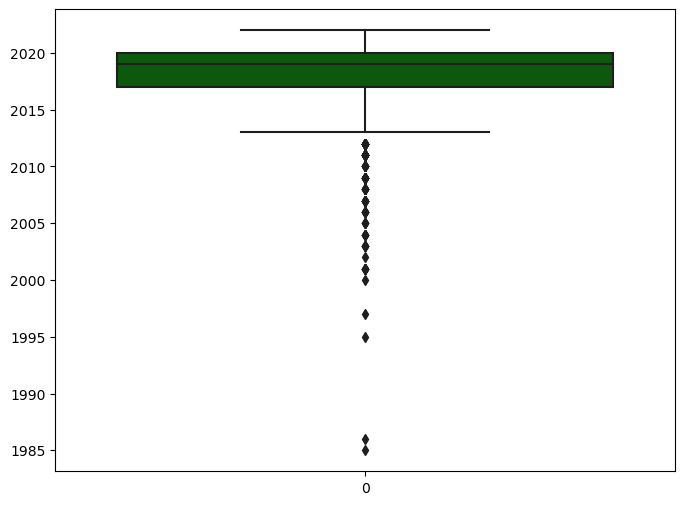

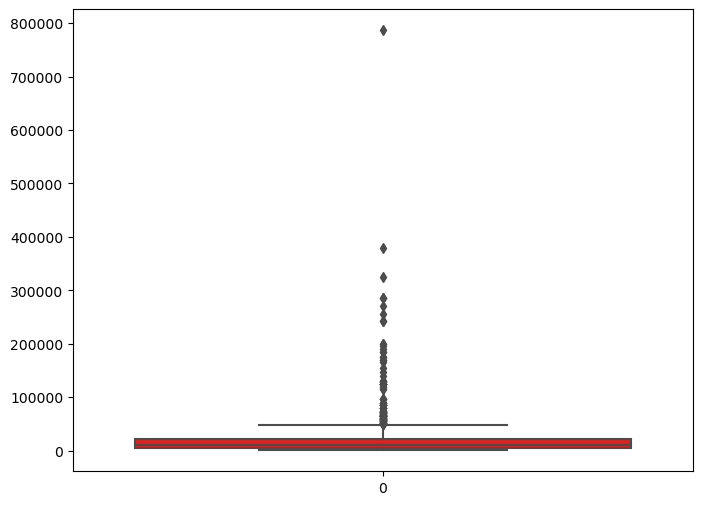

In [10]:
fig1, ax1 = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df['Год'], color='darkgreen')
#plt.yticks(range(1980, 2024, 1))
plt.show()

fig2, ax2 = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df['Цена'], color='red')
plt.show()

In [11]:
print(f'Медиана по столбцу с годами: {df.Год.median()}')
print(f'Медиана по столбцу с ценами: {df.Цена.median()}')

Медиана по столбцу с годами: 2019.0
Медиана по столбцу с ценами: 9990.0


1. Из ящика с усами с годами можно заметить, что медиана находится примерно на уровне 2019 года, посчитав ее, мы можем сказать это точно, 50% значений данных приходятся на 2017-2020 года, также можно заметить выбросы.
2. Медиана цен = 9990. Из ящика с усами с ценами можно увидеть, что присутствуют выбросы.

In [12]:
df[df['Цена'].values > 200000]

,Имя,Год,Страна,Сахар,Цена,Рейтинг,Количество отзывов
3,"Вино Petrus, Chateau Petrus",1997,Франция,Сухое,786590.0,4.8,1.0
4,Вино Chateau Latour,2000,Франция,Сухое,284990.0,5.0,1.0
13,Вино Chateau Latour,2003,Франция,Сухое,284990.0,5.0,1.0
24,Вино Chateau Margaux,2005,Франция,Сухое,269990.0,5.0,0.0
35,Вино Chateau Lafite Rothschild,2007,Франция,Сухое,242490.0,5.0,0.0
60,"Вино Set Chateau Montrose: 1995, 1998, 2000, 2...",2009,Франция,Вино,379990.0,0.0,0.0
61,"Вино Set Chateau Calon-Segur: 1998, 2000, 2003...",2009,Франция,Вино,254990.0,0.0,0.0
77,Вино Chateau Lafleur,2010,Франция,Сухое,242490.0,0.0,0.0
174,"Вино Chambolle-Musigny, Leroy",2014,Франция,Сухое,324990.0,0.0,0.0
491,"Вино La Faraona, Descendientes de Jose Palacios",2019,Испания,Сухое,200090.0,0.0,0.0


__Удаление выбросов цены__

In [13]:
idx_to_drop = df[(df['Цена'] > 200000) | (df['Цена'] < 790)].index
df = df.drop(idx_to_drop)
df

,Имя,Год,Страна,Сахар,Цена,Рейтинг,Количество отзывов
0,Вино Chateau Ducru-Beaucaillou,1985,Франция,Сухое,56990.0,5.0,0.0
1,Вино Chateau Ducru-Beaucaillou,1986,Франция,Сухое,59990.0,5.0,0.0
2,Вино Chateau Pichon Longueville Comtesse de La...,1995,Франция,Сухое,71490.0,0.0,0.0
5,Вино Chateau Leoville Las Cases,2001,Франция,Сухое,67990.0,0.0,0.0
6,Вино Chateau Calon Segur,2001,Франция,Сухое,39490.0,5.0,1.0
...,...,...,...,...,...,...,...
1089,"Вино Capitel Foscarino, Roberto Anselmi",2022,Италия,Полусухое,3990.0,5.0,1.0
1090,"Вино Sobaja Sauvignon, Pradio",2022,Италия,Сухое,1990.0,4.9,14.0
1091,"Вино Samas, Agricola Punica",2022,Италия,Сухое,2790.0,4.3,0.0
1092,"Вино Chablis, Domaine des Chenevieres",2022,Франция,Сухое,3003.0,4.8,3.0


__4. Добавление нового столбца с информацией о наличии отзывов__

In [14]:
df['Наличие отзывов'] = df['Количество отзывов'].apply(lambda x: 0 if x == 0 else 1 )
df

,Имя,Год,Страна,Сахар,Цена,Рейтинг,Количество отзывов,Наличие отзывов
0,Вино Chateau Ducru-Beaucaillou,1985,Франция,Сухое,56990.0,5.0,0.0,0
1,Вино Chateau Ducru-Beaucaillou,1986,Франция,Сухое,59990.0,5.0,0.0,0
2,Вино Chateau Pichon Longueville Comtesse de La...,1995,Франция,Сухое,71490.0,0.0,0.0,0
5,Вино Chateau Leoville Las Cases,2001,Франция,Сухое,67990.0,0.0,0.0,0
6,Вино Chateau Calon Segur,2001,Франция,Сухое,39490.0,5.0,1.0,1
...,...,...,...,...,...,...,...,...
1089,"Вино Capitel Foscarino, Roberto Anselmi",2022,Италия,Полусухое,3990.0,5.0,1.0,1
1090,"Вино Sobaja Sauvignon, Pradio",2022,Италия,Сухое,1990.0,4.9,14.0,1
1091,"Вино Samas, Agricola Punica",2022,Италия,Сухое,2790.0,4.3,0.0,0
1092,"Вино Chablis, Domaine des Chenevieres",2022,Франция,Сухое,3003.0,4.8,3.0,1


__5. Добавление столбца с ценовой категорией__

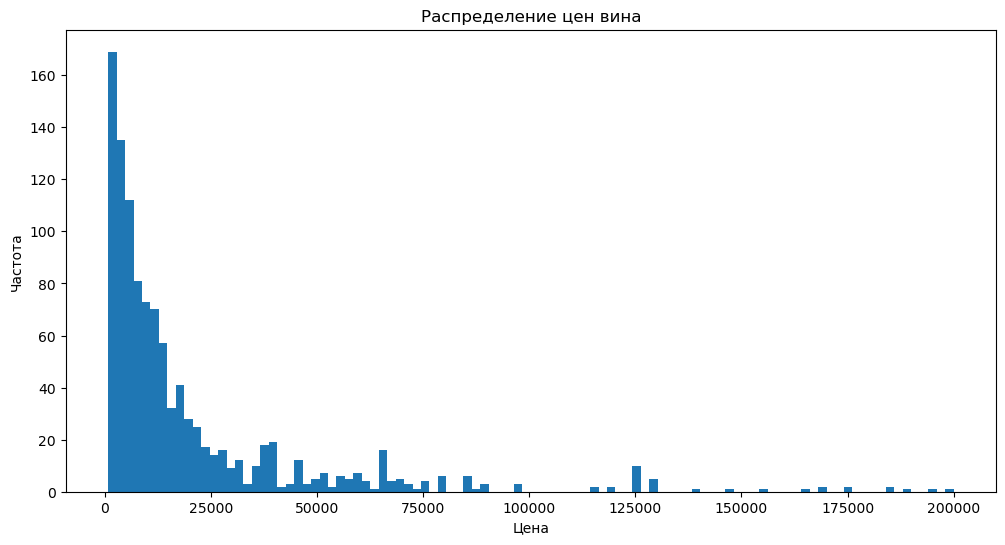

In [15]:
plt.subplots(figsize=(12, 6))
plt.hist(df['Цена'], bins=100)
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен вина')
plt.show()

In [16]:
quantiles = df['Цена'].quantile([0, 1/3, 2/3, 1])
bins = [quantiles.min(), quantiles[1/3], quantiles[2/3], quantiles.max()]
labels = ['Дешевое', 'Среднее', 'Дорогое']
df['Ценовая категория'] = pd.cut(df['Цена'], bins=bins, labels=labels)
df

,Имя,Год,Страна,Сахар,Цена,Рейтинг,Количество отзывов,Наличие отзывов,Ценовая категория
0,Вино Chateau Ducru-Beaucaillou,1985,Франция,Сухое,56990.0,5.0,0.0,0,Дорогое
1,Вино Chateau Ducru-Beaucaillou,1986,Франция,Сухое,59990.0,5.0,0.0,0,Дорогое
2,Вино Chateau Pichon Longueville Comtesse de La...,1995,Франция,Сухое,71490.0,0.0,0.0,0,Дорогое
5,Вино Chateau Leoville Las Cases,2001,Франция,Сухое,67990.0,0.0,0.0,0,Дорогое
6,Вино Chateau Calon Segur,2001,Франция,Сухое,39490.0,5.0,1.0,1,Дорогое
...,...,...,...,...,...,...,...,...,...
1089,"Вино Capitel Foscarino, Roberto Anselmi",2022,Италия,Полусухое,3990.0,5.0,1.0,1,Дешевое
1090,"Вино Sobaja Sauvignon, Pradio",2022,Италия,Сухое,1990.0,4.9,14.0,1,Дешевое
1091,"Вино Samas, Agricola Punica",2022,Италия,Сухое,2790.0,4.3,0.0,0,Дешевое
1092,"Вино Chablis, Domaine des Chenevieres",2022,Франция,Сухое,3003.0,4.8,3.0,1,Дешевое


$\color{blue}{\text{Границы получились такие:}}$

$\color{blue}{\text{Дешевое: от 790.0 до 5690.0}}$

$\color{blue}{\text{Среднее: от 5790.0 до 15990.0}}$

$\color{blue}{\text{Дорогое: от 16490.0 до 199990.0}}$

__6. Добавление столбца с соотношением цены и рейтинга__

In [17]:
scaler = MinMaxScaler()

df['Нормализованная_Цена'] = scaler.fit_transform(df[['Цена']])
df['Нормализованный_Рейтинг'] = scaler.fit_transform(df[['Рейтинг']])

df['Цена/Рейтинг'] = df['Нормализованная_Цена'] / df['Нормализованный_Рейтинг']
df.loc[df['Рейтинг'] == 0, 'Цена/Рейтинг'] = None

df = df.drop(['Нормализованная_Цена', 'Нормализованный_Рейтинг'], axis=1)

df

,Имя,Год,Страна,Сахар,Цена,Рейтинг,Количество отзывов,Наличие отзывов,Ценовая категория,Цена/Рейтинг
0,Вино Chateau Ducru-Beaucaillou,1985,Франция,Сухое,56990.0,5.0,0.0,0,Дорогое,0.282129
1,Вино Chateau Ducru-Beaucaillou,1986,Франция,Сухое,59990.0,5.0,0.0,0,Дорогое,0.297189
2,Вино Chateau Pichon Longueville Comtesse de La...,1995,Франция,Сухое,71490.0,0.0,0.0,0,Дорогое,NaN
5,Вино Chateau Leoville Las Cases,2001,Франция,Сухое,67990.0,0.0,0.0,0,Дорогое,NaN
6,Вино Chateau Calon Segur,2001,Франция,Сухое,39490.0,5.0,1.0,1,Дорогое,0.194277
...,...,...,...,...,...,...,...,...,...,...
1089,"Вино Capitel Foscarino, Roberto Anselmi",2022,Италия,Полусухое,3990.0,5.0,1.0,1,Дешевое,0.016064
1090,"Вино Sobaja Sauvignon, Pradio",2022,Италия,Сухое,1990.0,4.9,14.0,1,Дешевое,0.006147
1091,"Вино Samas, Agricola Punica",2022,Италия,Сухое,2790.0,4.3,0.0,0,Дешевое,0.011675
1092,"Вино Chablis, Domaine des Chenevieres",2022,Франция,Сухое,3003.0,4.8,3.0,1,Дешевое,0.011572


__7. Соотношение стран и количества вин__

In [18]:
cnt_countries = df['Страна'].value_counts()
cnt_countries

Франция                      546
Италия                       309
Испания                       54
Чили                          28
Австралия                     26
Соединенные Штаты Америки     22
Россия                        20
Австрия                       18
Германия                      17
Южная Африка                  16
Грузия                         9
Аргентина                      7
Армения                        4
Новая Зеландия                 2
Греция                         2
Португалия                     1
Венгрия                        1
Name: Страна, dtype: int64

### Зависимости

__1. Зависимость количественных переменных друг от друга__

In [19]:
mean_prices = df.groupby('Страна')['Цена'].mean()

print(mean_prices)


Страна
Австралия                    15721.269231
Австрия                       3811.055556
Аргентина                     3395.714286
Армения                       2740.000000
Венгрия                       6190.000000
Германия                      6119.588235
Греция                        4640.000000
Грузия                        2412.222222
Испания                      20974.314815
Италия                       14913.511327
Новая Зеландия                7775.000000
Португалия                   13510.000000
Россия                        2229.000000
Соединенные Штаты Америки    20553.318182
Франция                      26771.772894
Чили                          6800.464286
Южная Африка                 10152.500000
Name: Цена, dtype: float64


__Зависимость цены от рейтинга__

In [20]:
df_price_rate = df[df['Рейтинг'] > 0].dropna(subset=['Рейтинг'])

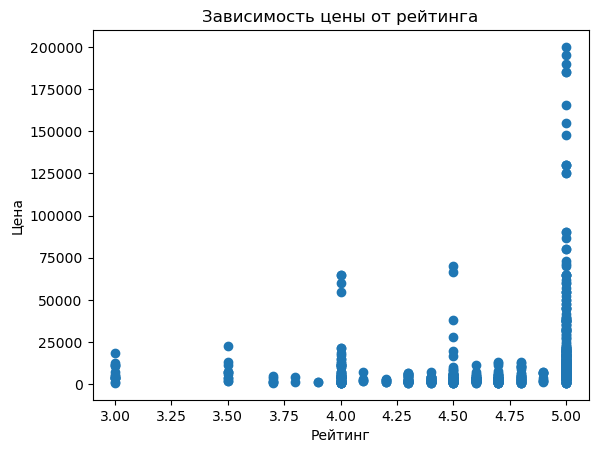

In [21]:
plt.scatter(df_price_rate['Рейтинг'], df_price_rate['Цена'])
plt.xlabel('Рейтинг')
plt.ylabel('Цена')
plt.title('Зависимость цены от рейтинга')
plt.show()

Мы обнаружили выбросы в рейтинге, равном 0, и удалили их для более точной иллюстрации зависимости

In [22]:
corr, p_value = pearsonr(df_price_rate['Рейтинг'], df_price_rate['Цена'])

print(f'Коэффициент корреляции: {corr}')

Коэффициент корреляции: 0.22712008307699375


Мы видим очень слабую корреляцию между ценой и рейтингом

__Зависимость цены от года__

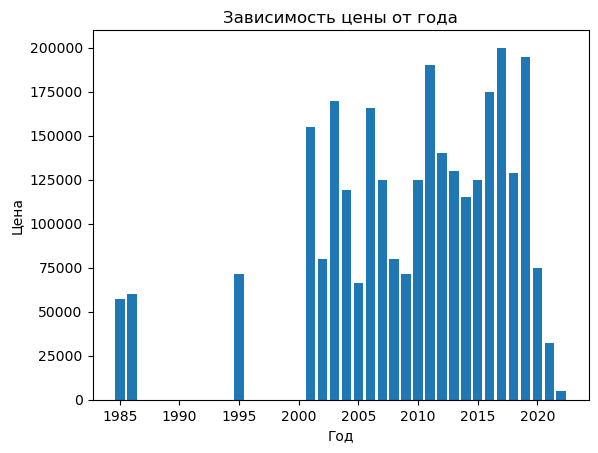

In [23]:
plt.bar(df['Год'], df['Цена'])
plt.xlabel('Год')
plt.ylabel('Цена')
plt.title('Зависимость цены от года')
plt.show()

In [24]:
year_ratings = [df[df['Год'] == year]['Цена'] for year in df['Год'].unique()]

statistic, p_value = kruskal(*year_ratings)

print("Статистика теста Краскела-Уоллиса:", statistic)
print("p-значение:", p_value)


Статистика теста Краскела-Уоллиса: 477.45554388200344
p-значение: 7.9071197999171e-86


Статистика теста Краскела-Уоллиса (480.81) является значительно большей, чем ожидаемое случайное значение. Это указывает на то, что существует статистически значимая разница между ценами вин для разных годов.

P-значение (1.6e-86) является крайне низким. Оно гораздо меньше стандартного уровня значимости 0.05, что позволяет нам отклонить нулевую гипотезу о том, что нет различий в ценах вин для разных годов. Таким образом, результаты теста Краскела-Уоллиса подтверждают, что есть статистически значимые различия в ценах вин в зависимости от года.

способ проверки предложил ChatGPT 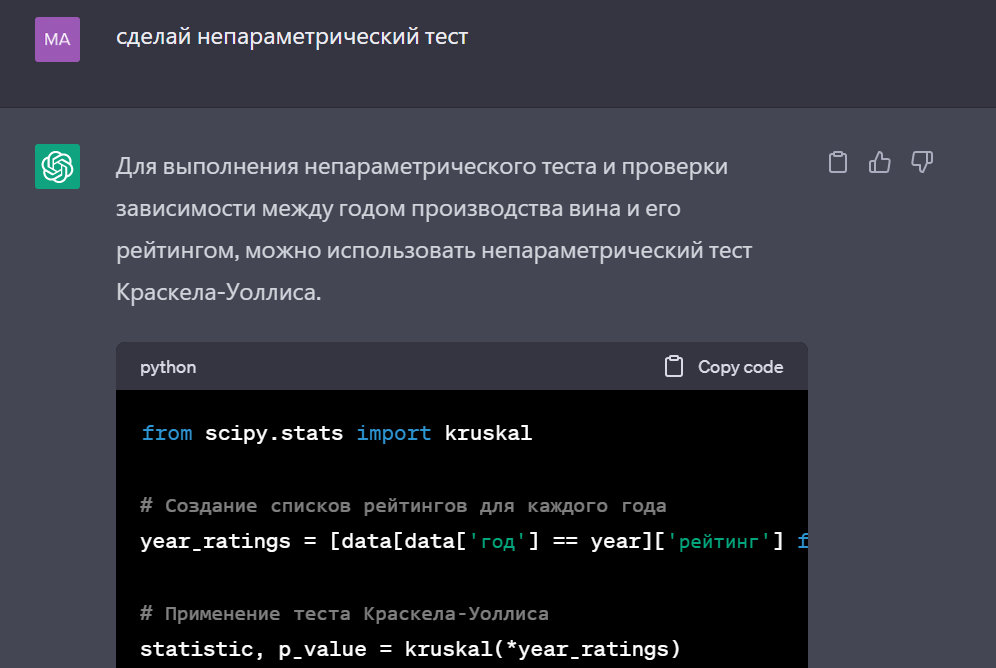
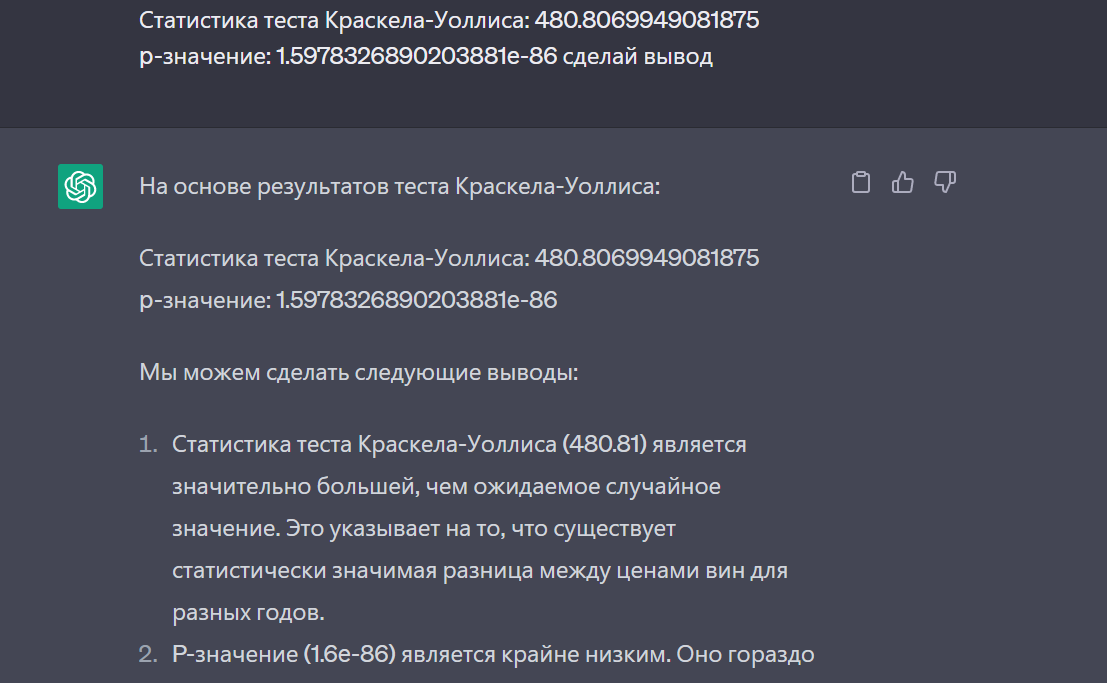

__Зависимость цены от страны__

In [25]:
top_stran = df.groupby('Страна')['Цена'].mean().sort_values().reset_index()
df_top_stran = pd.DataFrame({'Страна': top_stran['Страна'], 'Средняя цена': top_stran['Цена']}) 

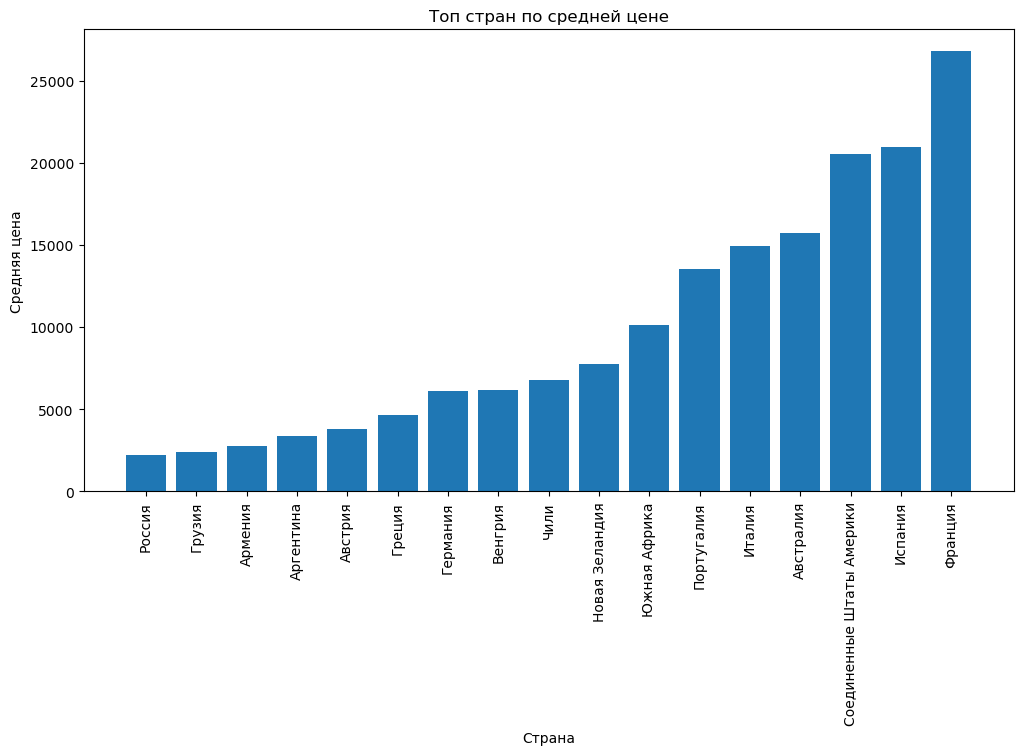

In [26]:
plt.subplots(figsize=(12, 6))
plt.bar(df_top_stran['Страна'], df_top_stran['Средняя цена'])
plt.xlabel('Страна')
plt.ylabel('Средняя цена')
plt.title('Топ стран по средней цене')
plt.xticks(rotation=90)
plt.show()

мы видим, что страна производства очень сильно влияет на цену, самые дешевые вина в России и Грузии, а самые дорогие в Испании и Франции

In [27]:
X = df_top_stran['Средняя цена'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

df_top_stran['Cluster'] = labels

print(df_top_stran)


                       Страна  Средняя цена  Cluster
0                      Россия   2229.000000        0
1                      Грузия   2412.222222        0
2                     Армения   2740.000000        0
3                   Аргентина   3395.714286        0
4                     Австрия   3811.055556        0
5                      Греция   4640.000000        0
6                    Германия   6119.588235        0
7                     Венгрия   6190.000000        0
8                        Чили   6800.464286        0
9              Новая Зеландия   7775.000000        0
10               Южная Африка  10152.500000        1
11                 Португалия  13510.000000        1
12                     Италия  14913.511327        1
13                  Австралия  15721.269231        1
14  Соединенные Штаты Америки  20553.318182        2
15                    Испания  20974.314815        2
16                    Франция  26771.772894        2


__Зависимость рейтинга от страны__

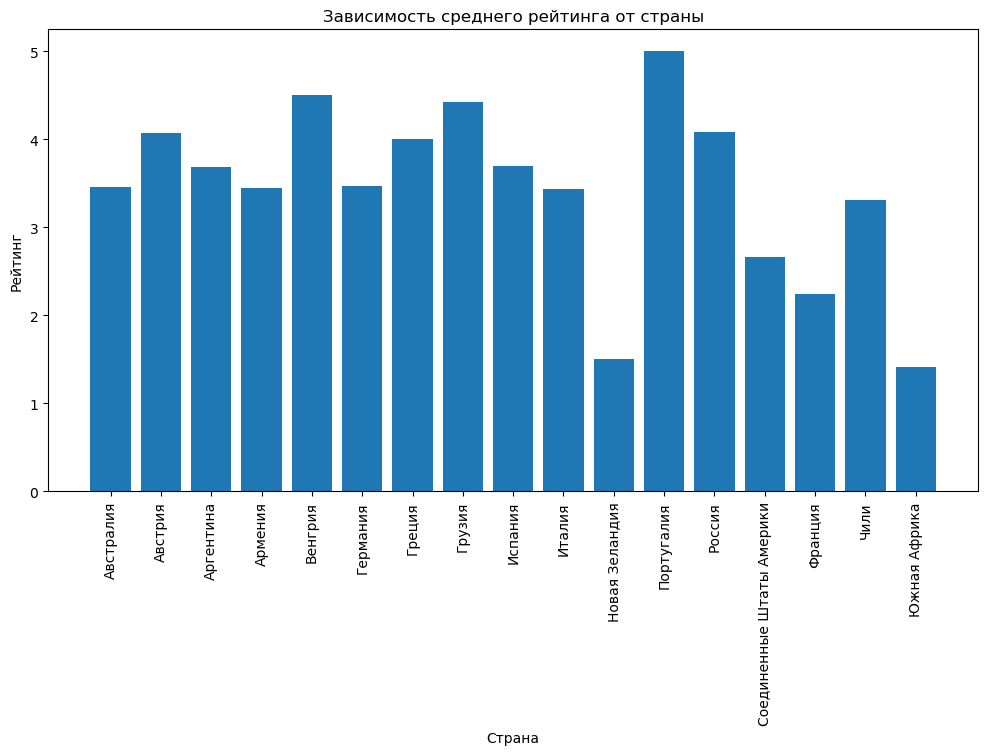

In [28]:
plt.figure(figsize=(12, 6))

grouped_data = df.groupby('Страна')['Рейтинг'].mean()
countries = grouped_data.index.astype(str)
ratings = grouped_data.values

plt.bar(countries, ratings)
plt.xlabel('Страна')
plt.ylabel('Рейтинг')
plt.title('Зависимость среднего рейтинга от страны')
plt.xticks(rotation=90)
plt.show()


In [29]:
output_file = 'dataset.csv'
df.to_csv(output_file, index=False)